Tài liệu này mang giấy phép Creative Commons Attribution (CC BY).
(c) Nguyễn Ngọc Sáng, Zhukovsky 12/2018.

[@SangVn](https://github.com/SangVn) [@VnCFD](https://vncfdgroup.wordpress.com/)

*Thực hành CFD với Python!*

# Bài 5. Phương trình Burgers (dòng chảy không nhớt)


Phương trình Burgers là phương trình đạo hàm riêng phi tuyến có dạng:

$$\frac {\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}  \qquad (1)$$

Ba hạng tử của phương trình này tương ứng với các tính chất: không ổn định (phụ thuộc thời gian), chuyển dịch, tiêu tán (khuyếch tán, tính nhớt). Đây là những tính chất thường gặp trong phương trình động lực học lưu chất, cụ thể là hệ phương trình Navier-Stockes, mô tả dòng chảy có nhớt. Nếu bỏ đi hạng tử nhớt, ta có phương trình dịch chuyển không tuyến tính:
$$\frac {\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0  \qquad (2)$$
Đây cũng chính là mô hình cho hệ phương trình Euler, mô tả dòng chảy không nhớt. Trong khuôn khổ bài 5 ta sẽ xem xét phương trình này.

Nếu trong phương trình dịch chuyển tuyến tính, 'sóng' di chuyển với tốc độ cố định $c$ (dẫn đến hình dạng không đổi) thì ở phương trình dịch chuyển phi tuyến, các điểm khác nhau trên 'sóng' dịch chuyển với vận tốc khác nhau $u$.
<img src="Bai_5.png" width=500>

Như mô tả trên hình, phần đỉnh sóng dịch chuyển với vận tốc lớn hơn, đến một thời điểm nào đó ($t=t_2$) đỉnh sóng sẽ 'vượt qua' chân sóng, tuy nhiên khi đó sẽ có nhiều nghiệm khác nhau, để đảm bảo `tính duy nhất của nghiệm` thì sẽ phải xuất hiện 'gián đoạn' ('đứt gãy') $ab$, nơi sóng 'đột ngột' thay đổi (shock). Tính chất này giống như `sóng xung kích` (shock wave) xuất hiện trong dòng chảy siêu âm không nhớt.

**Sơ đồ Lax (1954)**

Để xây dựng sơ đồ sai phân cho phương trình (2), ta xem xét phương pháp Lax. Viết lại phương trình ở dạng:
$$\frac {\partial u}{\partial t} + \frac{\partial F}{\partial x} = 0; F=u^2/2 \qquad (3)$$
Sử dụng khai triển Taylor:
$$u(x, t+\Delta t) = u(x, t) + \Delta t \frac{\partial u}{\partial t} + ... \qquad (4)$$
Thay (3) vào (4) ta có:
$$u(x, t+\Delta t) = u(x, t) - \Delta t \frac{\partial F}{\partial x} + ... \qquad (5)$$
Từ phương trình (5) Lax đề xuất sử dụng sơ đồ sai phân bậc một sau:

$$u_i^{n+1} = \frac{u_{i+1}^n + u_{i-1}^n}{2} - \frac{\Delta t}{\Delta x} \frac{F_{i+1}^n - F_{i-1}^n}{2}.$$
Sơ đồ này ổn định với điều kiện $|\frac{\Delta t}{\Delta x} u_{max}| \leq 1$, trong đó $u_{max}$ - trị riêng lớn nhất của ma trận Jacobi $A = dF/du$, trong trường hợp này A=|u|.

**Bài toán 1**

Để mô tả tính chất của phương trình dịch chuyển phi tuyến đã nói ở trên, ta xét bài toán với điều kiện ban đầu như sau:
$$u(x, 0) = 2 - x; 0\leq x \leq 1$$
$$u(x, 0) = 1; 1< x \leq 7$$

**Coding**

Với điều kiện ổn định của sơ đồ như trên đòi hỏi chúng ta phải tìm giá trị u_max và xác định bước thời gian cần thiết cho mỗi bước lặp. Sử dụng hàm `numpy.amax(u)` để tìm phần tử lớn nhất trong mảng u.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#thông số tính toán
nx = 71  #số điểm lưới
dx = 7./(nx-1) #kích thước ô lưới
x = np.linspace(0, 7, nx) #lưới 
r = 1. #điều kiện sơ đồ ổn định

#điều kiện ban đầu
u0 = np.ones(nx)
#for i in range(int(1./dx)):
#    u0[i] = 2 - x[i]
i = int(1./dx)
u0[:i] = 2 - x[:i]

#ham solver
def solver(u0, r, nt):
    u = u0.copy() #tạo mảng u để chứa giá trị nghiệm
    un = u0.copy() # mảng un chưa giá trị tạm thời 
    for n in range(nt):
        dt = r/np.amax(u)*dx #xác định u_max, dt 
        un = u.copy() #lưu nghiệm hiện tại 
        u[1:-1] = (un[2:] + un[0:-2])/2 - dt/dx*(un[2:]**2/2 - un[0:-2]**2/2)/2 #tìm nghiệm ở bước tiếp theo 
        
    return u #trả về giá trị nghiệm tìm được 


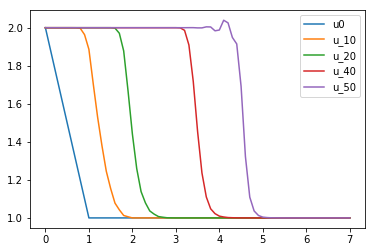

In [2]:

#tim nghiệm tại các bước thời gian khác nhau
u_10 = solver(u0, r, 10)
u_20 = solver(u0, r, 20)
u_40 = solver(u0, r, 40)
u_50 = solver(u0, 1.1, 50)
#đồ thị     
plt.plot(x, u0, x, u_10, x, u_20, x, u_40, x, u_50)

'''
câu lệnh trên tương đương với:
plt.plot(x, u0)
plt.plot(x, u_10)
plt.plot(x, u_20)
plt.plot(x, u_40)
plt.plot(x, u_50)
'''

plt.legend(['u0', 'u_10', 'u_20', 'u_40', 'u_50'])
plt.show()

Nghiệm tìm được khác mượt và chúng ta chưa thấy xuất hiện 'gián đoạn' thực sự. Để thu được độ chính xác lớn hơn, các bạn hãy tìm hiểu và sử dụng sơ sơ đồ bậc hai Lax-Wendroff. Lúc đó 'gián đoạn' thu được có độ dốc lớn hơn, nhưng xuất hiện các dao động do tính chất 'phân tán' của sơ đồ bậc 2.
Ta cũng thấy rằng với $r = 1.1$, sơ đồ không ổn định (nghiệm u_50).

Để nghiên cứu quá trình dịch chuyển gián đoạn cho phương trình Burgers, người ta thường sử dụng bài toán sau:
$$u(x, 0) = a, x \leq x_0;\quad u(x, 0) = b, x > x_0; \quad a > b$$ 
Nghiệm chính xác: $$u(x, t) = a, x \leq x_0+st; \quad u(x, t) = b, x > x_0+st$$
với s là vận tốc dịch chuyển gián đoạn và bằng (a+b)/2. 
Nhờ biết được nghiệm chính xác, ta có thể dễ dàng kiểm tra kết quả tính toán.

**Bài toán 2**

Ngoài `sóng xung kích`, một hiện tượng khác của dòng chảy mà phương trình Burgers có thể mô tả đó là `sóng giãn`. Bài toán đặc trưng là: 
$$u(x, 0) = a, x \leq x_0;\quad u(x, 0) = b, x > x_0; \quad a < b$$
Nghiệm chính xác: 
$$u(x, t) = a, x\leq x_0+at;\quad u(x, t) = (x-x_0)/t, x_0+at < x < x_0+bt; \quad u(x, t) = b, x \geq x_0+bt$$
Ở đây, dao động bên trái chuyển động chậm hơn dao động bên phải. Do bên trái không 'bắt kịp' bên phải nên sẽ sinh ra một vùng 'giãn', 'loãng' ở giữa.

Cụ thể, ta xem xét bài toán:
$$u(x, 0) = 0, x\leq 3;\ u(x, 0) = 1, x > 3$$
Nghiệm chính xác tại thời điểm t là:
$$u = 0, x\leq 3; u = (x-3)/t, 3<x<3+t; u = 1, x\geq 3+t$$

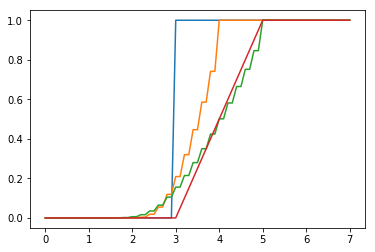

In [58]:
#Để so sánh với nghiệm chính xác, ta sửa lại hàm solver để trả về thêm giá trị thời gian

def solver2(u0, r, nt):
    u = u0.copy()  # tạo mảng u để chứa giá trị nghiệm
    un = u0.copy() # mảng un chưa giá trị tạm thời 
    t = 0          # thời gian t
    for n in range(nt):
        dt = r/np.amax(u)*dx #xác định u_max, dt 
        un = u.copy()        #lưu nghiệm hiện tại 
        u[1:-1] = (un[2:] + un[0:-2])/2 - dt/dx*(un[2:]**2/2 - un[0:-2]**2/2)/2 #tìm nghiệm ở bước tiếp theo 
        t += dt #tính giá trị t
    return u, t #trả về giá trị nghiệm tìm được và thời gian t

#điều kiện ban đầu
u0 = np.zeros(nx)
u0[int(3./dx):] = 1

u_10 = solver(u0, r, 10);
u_20, t = solver2(u0, r, 20);

#nghiệm chính xác
u_cs = u0.copy()
for i in range(int(3./dx), int((3.+t)/dx)):
    u_cs[i] = (x[i]-3)/t
    
plt.plot(x, u0)
plt.plot(x, u_10)
plt.plot(x, u_20)
plt.plot(x, u_cs)
plt.show()

Ta thấy sơ đồ Lax cho nghiệm không chính xác. Để so sánh, bạn hãy thử sử dụng sơ đồ Upwind:
$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$
Với hai bài toán sóng xung kích và sóng giãn đều có nghiệm chính xác, phương trình Burgers thường được sử dụng để kiểm tra các phương pháp tính.

## [Bài 6. Phương trình Burgers (dòng chảy có nhớt)](Bai_6.ipynb)